In [1]:
from zipfile import ZipFile
file_name = "expression.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")



Done


In [ ]:

!pip install --upgrade tensorflow keras




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [ ]:
!pip install tensorflow keras





In [ ]:
!pip install --upgrade tensorflow keras


In [2]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:

train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a fixed learning rate
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Train the model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)



/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 43s 78ms/step - accuracy: 0.2493 - loss: 1.8292 - val_accuracy: 0.3104 - val_loss: 1.6959
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2656 - loss: 1.7637

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2656 - loss: 1.7637 - val_accuracy: 0.3000 - val_loss: 1.8012
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.3481 - loss: 1.6544 - val_accuracy: 0.4210 - val_loss: 1.5172
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.5156 - loss: 1.3394 - val_accuracy: 0.3000 - val_loss: 1.6200
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4115 - loss: 1.5254 - val_accuracy: 0.4565 - val_loss: 1.4296
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.5938 - loss: 1.2166 - val_accuracy: 0.3000 - val_loss: 1.5990
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.4485 - loss: 1.4495 - val_accuracy: 0.4749 - val_loss: 1.3739
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.4219 - loss: 1.4557 - val_accuracy: 0.3000 - val_loss: 1.6532
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.4737 - loss: 1.3821 - val_accuracy: 0.

In [5]:
#Saving the model
emotion_model.save('model.h5')



In [6]:


from keras.models import load_model
emotion_model = load_model('model.h5')

In [7]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [8]:


#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [10]:
take_photo()





<IPython.core.display.Javascript object>

'photo.jpg'

In [11]:


import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)






--2024-11-23 10:06:30--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.005s  

2024-11-23 10:06:30 (162 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Emotion probabilities: [[0.14433184 0.13875186 0.14152485 0.14151233 0.1464457  0.14138244
  0.14605099]]


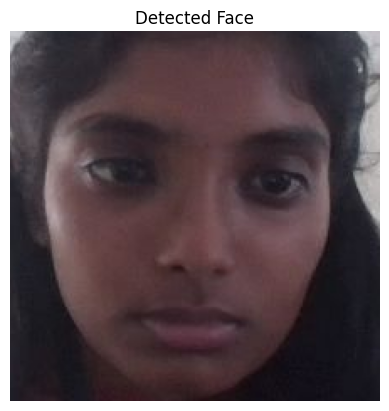

In [12]:
# if __name__ == '__main__':
#     facecrop('/content/photo.jpg')

# #Testing a file.

# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

# import numpy as np
# import matplotlib.pyplot as plt


# file = '/content/capture.jpg'
# true_image = image.load_img(file)
# img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis = 0)

# x /= 255

# custom = emotion_model.predict(x)
# emotion_analysis(custom[0])

# x = np.array(x, 'float32')
# x = x.reshape([48, 48]);


# plt.imshow(true_image)
# plt.show()
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Download Haar Cascade
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise ValueError("Failed to load Haar Cascade.")

# Function to crop face
def facecrop(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        raise ValueError("No faces detected in the image.")

    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
        return cropped_face

# Load the image and crop face
file = 'photo.jpg'
cropped_face = facecrop(file)

# Preprocess the image
img = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (48, 48))
x = np.expand_dims(img, axis=0)
x = np.expand_dims(x, axis=-1)
x = x / 255.0

# Load pre-trained model (ensure you upload your .h5 file)
emotion_model = load_model('model.h5')

# Predict emotion
custom = emotion_model.predict(x)
print("Emotion probabilities:", custom)

# Visualize input image
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Face")
plt.show()



--2024-11-23 10:06:38--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.006s  

2024-11-23 10:06:38 (148 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted Emotion: Sad


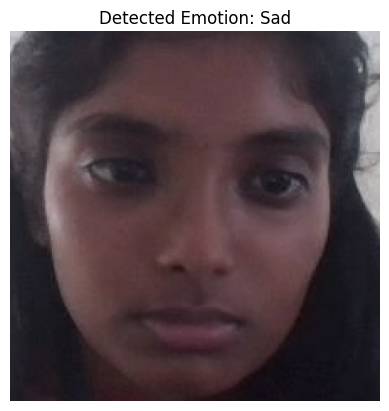

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Download Haar Cascade for face detection
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise ValueError("Failed to load Haar Cascade.")

# Emotion Labels (change according to your model's output)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to crop face from image
def facecrop(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        raise ValueError("No faces detected in the image.")

    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
        return cropped_face

# Load and crop the face from the image
file = '/content/photo.jpg'  # Upload this image to Colab
cropped_face = facecrop(file)

# Preprocess the cropped face
img = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img = cv2.resize(img, (48, 48))  # Resize to match input size for the model

# Add batch dimension (needed for prediction) and normalize the image
x = np.expand_dims(img, axis=0)
x = np.expand_dims(x, axis=-1)  # Add channel dimension
x = x / 255.0  # Normalize pixel values to [0, 1]

# Load the pre-trained emotion detection model
emotion_model = load_model('model.h5')  # Update with correct model path

# Predict emotion from the cropped face
emotion_probabilities = emotion_model.predict(x)

# Get the emotion label with the highest probability
predicted_emotion = emotion_labels[np.argmax(emotion_probabilities)]

# Print the predicted emotion
print(f"Predicted Emotion: {predicted_emotion}")

# Visualize the detected face and predicted emotion
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Detected Emotion: {predicted_emotion}")
plt.show()
